In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
filename = 'synth_data/synth_case1.csv'

th_gt = params2theta(torch.tensor((1e3,5*1e3,10*1e3)),
                     torch.tensor((100,300,800)),
                     torch.tensor((2/5,1/5,2/5)))


In [4]:
filename = 'synth_data/synth_case3.csv'

th_gt = params2theta(torch.tensor((1e3,2.5*1e3,7*1e3)),
                     torch.tensor((100,300,500)),
                     torch.tensor((2/6,1/2,1/6)))

In [5]:
filename = 'synth_data/synth_case4.csv'

th_gt = params2theta(torch.tensor((15*1e3,12*1e3,7*1e3)),
                     torch.tensor((3000,1000,500)),
                     torch.tensor((2/6,1/2,1/6)))

In [6]:
filename = 'synth_data/synth_case2.csv'

th_gt = params2theta(torch.tensor((1e3,5*1e3,15*1e3)),
                     torch.tensor((100,300,1000)),
                     torch.tensor((1/6,1/2,2/6)))


In [7]:
data = load_dataset(filename,Nmax=1000,cutoff=50)

In [8]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()


tensor(-3908.7475, device='cuda:0', dtype=torch.float64)

In [9]:
data.evaluate(tol=1e-5,lr=.1)

4.463465796981667 -3913.8535240035026 -543.6511697842664
4.396785904221202 -3914.8593950403015 -476.4003979646331
4.363733204479698 -3912.52519262209 -449.3062280132654
4.3543497902815 -3912.4553926215012 -441.5430373381388
4.352144268159936 -3910.715559305482 -441.0889358513023
4.3497990320603295 -3909.6832603232447 -439.9561347255829
4.348268209342285 -3909.433358923539 -438.7025243516781


(tensor([ 5026.8460,  5025.2481,   967.5374,  5053.3720, 14773.1546,  4989.3459,
         14705.6602, 14897.2224,  4968.3702,  4956.2572, 15009.3578, 15063.0161,
           947.8250,  4814.1635,   956.8145, 16549.1986,  4381.2855, 16597.2253,
         16301.5110,  1969.7057, 11664.2485,  1522.0838,  1440.2799],
        device='cuda:0', dtype=torch.float64),
 tensor([ 350.1675,  371.8933,   58.7158,  416.8446, 1247.3473,  442.4585,
         1278.4912, 1411.7106,  509.3197,  549.6019, 1596.5574, 1724.5227,
          117.6354,  777.1368,  140.8071, 2980.3736,  997.7062, 3906.3111,
         4400.4639,  680.5465, 5209.5397,  622.1793,  625.2210],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1245, 0.1097, 0.1072, 0.0856, 0.0825, 0.0747, 0.0730, 0.0567, 0.0512,
         0.0414, 0.0410, 0.0354, 0.0259, 0.0190, 0.0173, 0.0138, 0.0121, 0.0091,
         0.0066, 0.0065, 0.0034, 0.0022, 0.0015], device='cuda:0',
        dtype=torch.float64))

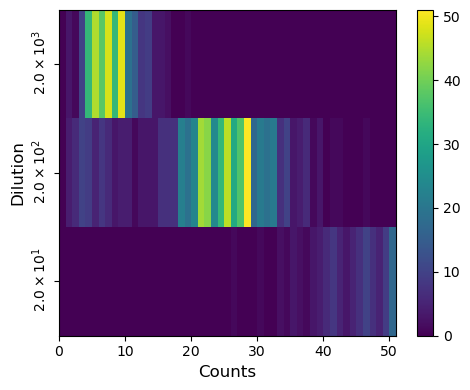

In [10]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.dill_imshow(ax,fig)
plt.tight_layout()
plt.savefig('graphs/synth/fig3a.png',dpi=500)

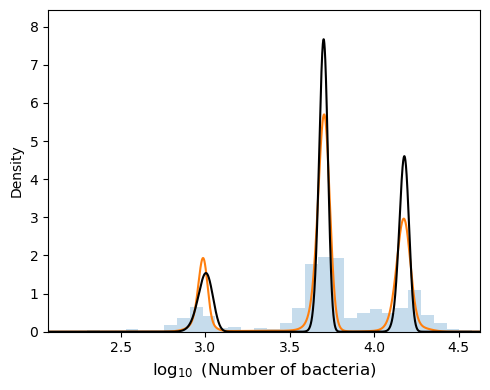

In [11]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.log_plots(ax,th_gt)
plt.tight_layout()
fig.savefig('graphs/synth/fig3b',dpi=500)

In [12]:
del data.lpkdil_n
#del data

In [13]:
data_nocutoff = load_dataset(filename,Nmax=1000,cutoff=-1)

data_nocutoff.evaluate(tol=1e-5,lr=.1)

4.2321654688695975 -3668.816494344768 -554.7449304703117
4.150577745350986 -3663.392403840794 -480.82027705612836
4.114991898006716 -3664.3436577495722 -449.1574068874751
4.108260430501622 -3666.571183311559 -441.59635788728883
4.107363291663975 -3665.9849116416426 -441.1847361470799
4.104778796424884 -3665.1363902554576 -439.446183079886
4.103303552451352 -3664.275129352626 -438.91499702454075


(tensor([  886.9100,  5148.3674,  5143.3534,  5148.4809,  5115.8984,  5153.7689,
          5140.5260, 17400.8074, 17416.9223, 17253.7175,  5115.3264, 17273.4404,
         17232.8762,  5026.8948,  4921.6291,  5072.1410, 16160.3754, 11638.7658,
          3827.8262,  2543.8015,   597.0731,  1636.0830], device='cuda:0',
        dtype=torch.float64),
 tensor([  32.4659,  416.7147,  438.6039,  457.8373,  493.8259,  510.2026,
          533.3975, 1520.4449, 1612.4150, 1678.3338,  658.8769, 2011.8757,
         2178.3430,  744.2547,  889.3164,  977.5647, 3608.2268, 4775.1951,
         1144.4246, 1048.8488,  176.1124,  792.6717], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1521, 0.1173, 0.1042, 0.0920, 0.0808, 0.0721, 0.0637, 0.0541, 0.0478,
         0.0401, 0.0359, 0.0294, 0.0256, 0.0222, 0.0176, 0.0130, 0.0125, 0.0070,
         0.0055, 0.0031, 0.0022, 0.0015], device='cuda:0', dtype=torch.float64))

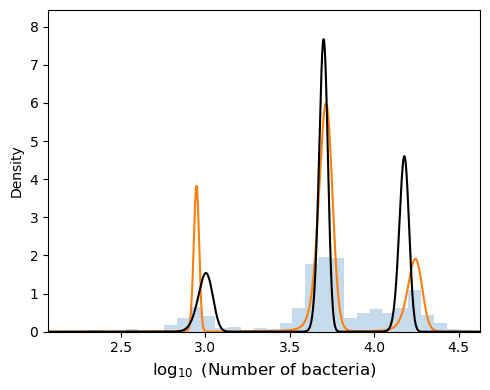

In [14]:
fig,ax = plt.subplots(1,figsize=(5,4))
data_nocutoff.log_plots(ax,th_gt)
plt.tight_layout()
fig.savefig('graphs/synth/fig3c',dpi=500)

In [53]:
th_means = torch.exp(th_gt[:3]).to(data.device)
v_cutoff, ind = torch.min(torch.abs(data.ev[0]-th_means.reshape(-1,1)),axis=0)
((v_cutoff/th_means[ind])*data.ev[-1]).sum()

tensor(0.0258, device='cuda:0', dtype=torch.float64)

In [54]:
(v_cutoff/th_means[ind])

tensor([5.3696e-03, 5.0500e-03, 3.2463e-02, 1.0675e-02, 1.5123e-02, 2.1304e-03,
        1.9623e-02, 6.8520e-03, 6.3256e-03, 8.7482e-03, 6.2372e-04, 4.2009e-03,
        5.2175e-02, 3.7167e-02, 4.3186e-02, 1.0328e-01, 1.2374e-01, 1.0648e-01,
        8.6767e-02, 9.6971e-01, 2.2238e-01, 5.2208e-01, 4.4028e-01],
       device='cuda:0', dtype=torch.float64)

In [55]:
data.ev[-1]

tensor([0.1245, 0.1097, 0.1072, 0.0856, 0.0825, 0.0747, 0.0730, 0.0567, 0.0512,
        0.0414, 0.0410, 0.0354, 0.0259, 0.0190, 0.0173, 0.0138, 0.0121, 0.0091,
        0.0066, 0.0065, 0.0034, 0.0022, 0.0015], device='cuda:0',
       dtype=torch.float64)

In [56]:
v_nocutoff, ind = torch.min(torch.abs(data_nocutoff.ev[0]-th_means.reshape(-1,1)),axis=0)
((v_nocutoff/th_means[ind])*data_nocutoff.ev[-1]).sum()

tensor(0.0749, device='cuda:0', dtype=torch.float64)

In [49]:
(v_nocutoff/th_means[ind])

tensor([0.1131, 0.0297, 0.0287, 0.0297, 0.0232, 0.0308, 0.0281, 0.1601, 0.1611,
        0.1502, 0.0231, 0.1516, 0.1489, 0.0054, 0.0157, 0.0144, 0.0774, 0.2241,
        0.2344, 1.5438, 0.4029, 0.6361], device='cuda:0', dtype=torch.float64)

In [50]:
data_nocutoff.ev[-1]

tensor([0.1521, 0.1173, 0.1042, 0.0920, 0.0808, 0.0721, 0.0637, 0.0541, 0.0478,
        0.0401, 0.0359, 0.0294, 0.0256, 0.0222, 0.0176, 0.0130, 0.0125, 0.0070,
        0.0055, 0.0031, 0.0022, 0.0015], device='cuda:0', dtype=torch.float64)

In [52]:
data.rhosprior.concentration/data.rhosprior.concentration.sum()

tensor([0.1077, 0.0970, 0.0873, 0.0785, 0.0707, 0.0636, 0.0573, 0.0515, 0.0464,
        0.0417, 0.0376, 0.0338, 0.0304, 0.0274, 0.0246, 0.0222, 0.0200, 0.0180,
        0.0162, 0.0146, 0.0131, 0.0118, 0.0106, 0.0095, 0.0086],
       device='cuda:0')